# PHY407 Lab01: Python Basics
### Andrew Hardy and Brayden Kell
### September 2018

## 1. Question 1
### 1.1 Part a: Discretization of ODE sytem

As an approximation, we can write the following expression of Newtonian gravitational force law: 
\begin{equation}
    \vec{F_g} = -\frac{GM_sM_p}{r^3}(x\hat{x} + y\hat{y}) \qquad (1)
\end{equation}
where $r$ is the distance planet $p$ is from the sun $s$ is orbits ($M_s>>M_p$). From this, we have the following system of ODEs governing the orbital path of the planet about the sun:
\begin{equation}
    \frac{dv_x}{dt}  = -\frac{GM_sx}{r^3} \qquad (2)
\end{equation}
\begin{equation}
    \frac{dv_y}{dt}  = -\frac{GM_sy}{r^3} \qquad (3)
\end{equation}
\begin{equation}
    \frac{dx}{dt} = v_x \qquad (4)
\end{equation}
\begin{equation}
    \frac{dy}{dt} = v_y \qquad (5)
\end{equation}
Note: $r = \sqrt{x^2 + y^2}$, of course.
We can discretize the above system to perform numerical integration according to the Euler method, which in generality represents position and velocity given by $\frac{dx}{dt} = f(t,v)$ and $\frac{dv}{dt} = g(t,x)$, respectively in the following forms:
\begin{equation}
    v_{i+1} = v_i + g(t_i, x_i)\Delta t \qquad (6)
\end{equation}
\begin{equation}
    x_{i+1} = x_i + f(t_i, v_i)\Delta \qquad (7)
\end{equation}
Equations (4) and (5) in Euler-Cromer form become:
\begin{equation}
    x_{i+1} = x_i + v_{x,i}\Delta t \qquad (8)
\end{equation}
and
\begin{equation}
    y_{i+1} = y_i + v_{y,i}\Delta t \qquad (9)
\end{equation}
Equations (1) and (2) are discretized as:
\begin{equation}
    v_{x,i+1} = v_{x,i} - \frac{GM_s}{r^3}x_i\Delta t \qquad (10)
\end{equation}
and 
\begin{equation}
    v_{y,i+1} = v_{y,i} - \frac{GM_s}{r^3}y_i\Delta t \qquad (11)
\end{equation}
where $x_i$ and $y_i$ given as in equations (8) and (9), respectively. 
However, it is known that this method is unstable, so we will instead use the slightly revised version, often referred to as the Euler-Cromer method where $v_i \rightarrow v_{i+1}$ in equation (7).

### 1.2 Part b: Pseudo-code for numerical integration to model Newtonian orbital path and velocity
1. Import required packages for handling arrays and plotting tools.
2. Define values for necessary constants like $G$, time-step, and duration of time for which you want to model in appropriate units and instantiate an array of time points accordingly. Note: we will work in units were mass is represented in units where mass of the sun is 1, and our units of length and time will be astronomical units and years, respectively.  
3. Define initial conditions for position components $x$, $y$ and velocity components $v_x$, $v_y$. 
4. Instantiate empty arrays of length t for $x$, $y$, $v_x$, and $v_y$ to preallocate memory for them before numerical integration. Store the respective initial conditions previously defined at the $0^{th}$ index of each of these arrays. 
5. Within a for-loop from 0 to 1 less than the length of t (1 less since at each index $i$ you are approximating the $(i+1)^{th}$ value of position and velocity, perform numerical integration, storing the approximated values for $x$, $y$, $v_x$, and $v_y$ in their respective pre-defined arrays. 
    \item Finally, plot $x$ vs. $y$ to get a graphical representation of the planet's orbit about the sun, and plot $v_x$ vs. time as well as $v_y$ vs. to to visualize how the planet's velocity changes over time. 
6. Calculate the magnitude of the angular momentum via the cross product of the position and velocity ( neglecting constant mass). The constant angular momentum insures our system is physical.
    
### 1.3 Part c: Implementation and executation of code
See commented Python code below and plot outputs. 

In [2]:
#1. import required packages
import numpy as np #import numpy
import matplotlib.pyplot as plt #import stuff for plotting
import time 
import seaborn as sns
sns.set()

In [3]:
#2.Define some constants and time array
G = 39.5 #gravitational constant in units of AU^3M_s^-1yr^-2 where M_s represents the mass of the sun in our system and AU is astronomical unit
Ms = 1 #for definiteness, defining Ms as 1 in units of 2.0x10^30kg
dt = 0.0001 #time step
duration = 1 #1year
num = round(duration/dt)#number of time steps
t = np.linspace(0, duration, num)

In [4]:
#3. Define initial conditions
x_init = 0.47 #AU
y_init = 0.0 #AU
Vx_init = 0.0 #AU/year
Vy_init = 8.17 #AU/yearx = np.empty(num)

In [5]:
#4. Instantiate empty arrays for x, y, v_x, v_y to preallocate memory
x = np.empty(num)
y = np.empty(num)
Vx = np.empty(num)
Vy = np.empty(num)
r = np.empty(num)
L = np.empty(num)

In [9]:
#5. Numerical integration (Euler-Cromer method) NEWTON
#storing the initial conditions in the first entry of arrays to hold position and velocity data before numerical integration
x[0] = x_init
y[0] = y_init
Vx[0] = Vx_init
Vy[0] = Vy_init
r[0] = np.sqrt(x_init**2+y_init**2)
L[0] = np.sqrt((x[0]*Vy[0]-y[0]*Vx[0])**2)  # angular momentum magnitude, from cross product with z = 0
#integrate to get position and velocity components
for i in range(num-1):
    r[i+1] = np.sqrt(x[i]**2 + y[i]**2)
    Vx[i+1] = Vx[i] - G*Ms*x[i]*dt/r[i+1]**3
    Vy[i+1] = Vy[i] - G*Ms*y[i]*dt/r[i+1]**3
    x[i+1] = x[i] + Vx[i+1]*dt
    y[i+1] = y[i] + Vy[i+1]*dt
    L[i+1] = np.sqrt((x[i+1]*Vy[i+1]-y[i+1]*Vx[i+1])**2)


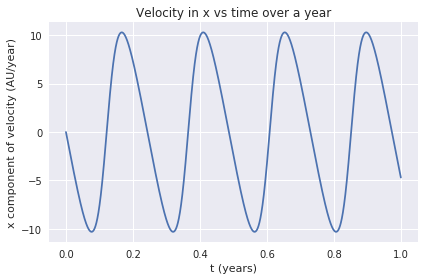

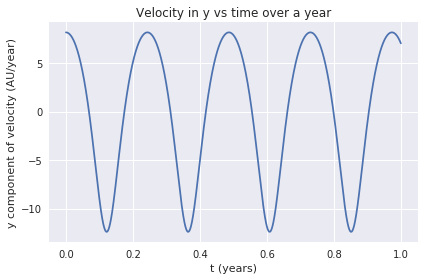

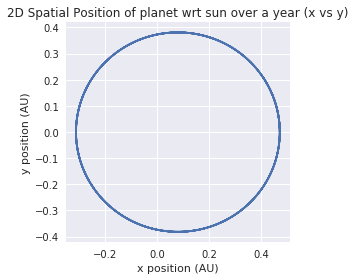

In [10]:
#6. Plot results of integration
plt.figure()

plt.plot(t,Vx)
plt.title('Velocity in x vs time over a year')
plt.xlabel('t (years)')
plt.ylabel('x component of velocity (AU/year)')
plt.tight_layout()

plt.show()

plt.figure()

plt.plot(t,Vy)
plt.title('Velocity in y vs time over a year')
plt.xlabel('t (years)')
plt.ylabel('y component of velocity (AU/year)')
plt.tight_layout()

plt.show()

plt.figure()

plt.plot(x,y)
plt.title('2D Spatial Position of planet wrt sun over a year (x vs y)')
plt.xlabel('x position (AU)')
plt.ylabel('y position (AU)')
plt.axis('scaled')
plt.tight_layout()

plt.show()


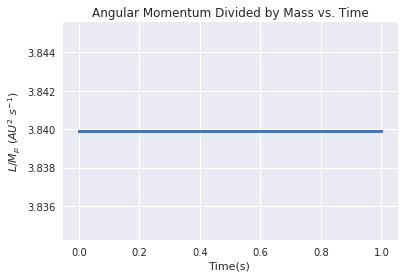

[3.8399 3.8399 3.8399 ... 3.8399 3.8399 3.8399]


In [11]:
#Check if anglular momentum conserved
# Note, not considering constant scaling factor of mass 
plt.figure()
plt.scatter(t, L,s=5)
plt.title('Angular Momentum Divided by Mass vs. Time')
plt.xlabel('Time(s)')
plt.ylabel('$L/M_p$ ($AU^2$ $s^{-1}$)')
plt.show()

print(L)

### 1.4 Part d: Revised code to model orbit using general relativity law of gravitational force approximation
Again, see commented Python code below and plot outputs. 

In [14]:
#5. (GR) Numerical integration (Euler-Cromer method) GENERAL RELATIVITY
#storing the initial conditions in the first entry of arrays to hold position and velocity data before numerical integration
x_GR[0] = x_init
y_GR[0] = y_init
Vx_GR[0] = Vx_init
Vy_GR[0] = Vy_init
L_GR[0] = np.sqrt((x_GR[0]*Vy_GR[0]-y_GR[0]*Vx_GR[0])**2)  # angular momentum magnitude, from cross product with z = 0
#define GR correction constant alpha for our planetary scenario
alpha = 0.01 #AU^2
#NOTE: must only perform numerical integration steps and plotting of results again. Everything else we need is in memory from the Newtonian model. 
#integrate to get position and velocity components
for i in range(num-1):
    r = np.sqrt(x[i]**2 + y[i]**2)
    Vx[i+1] = Vx_GR[i] - G*Ms*(1+alpha/r**2)*x_GR[i]*dt/r**3
    Vy[i+1] = Vy_GR[i] - G*Ms*(1+alpha/r**2)*y_GR[i]*dt/r**3
    x[i+1] = x_GR[i] + Vx_GR[i+1]*dt
    y[i+1] = y_GR[i] + Vy_GR[i+1]*dt
    L[i+1] = np.sqrt((x_GR[i+1]*Vy_GR[i+1]-y_GR[i+1]*Vx_GR[i+1])**2)


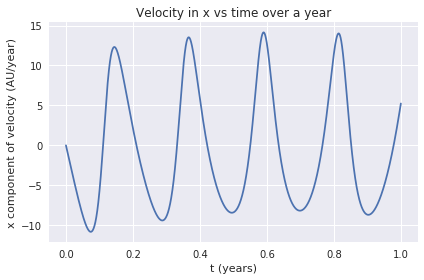

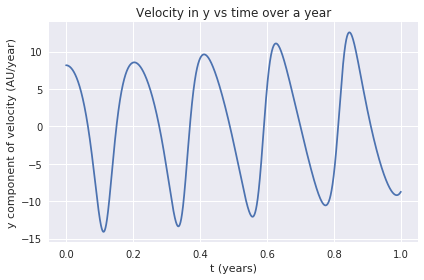

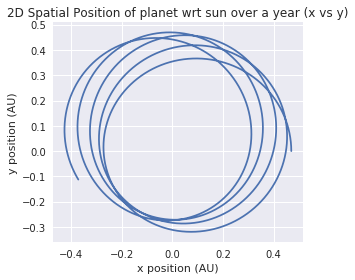

In [15]:
#6. (GR) Plot results of integration
plt.figure()

plt.plot(t,Vx_GR)
plt.title('Velocity in x vs time over a year')
plt.xlabel('t (years)')
plt.ylabel('x component of velocity (AU/year)')
plt.tight_layout()

plt.show()

plt.figure()

plt.plot(t,Vy_GR)
plt.title('Velocity in y vs time over a year')
plt.xlabel('t (years)')
plt.ylabel('y component of velocity (AU/year)')
plt.tight_layout()

plt.show()

plt.figure()

plt.plot(x_GR,y_GR)
plt.title('2D Spatial Position of planet wrt sun over a year (x vs y)')
plt.xlabel('x position (AU)')
plt.ylabel('y position (AU)')
plt.axis('scaled')
plt.tight_layout()

plt.show()


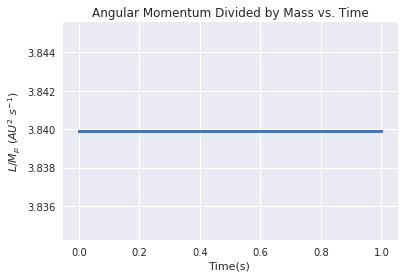

[3.8399 3.8399 3.8399 ... 3.8399 3.8399 3.8399]


In [16]:
#Check if anglular momentum conserved
# Note, not considering constant scaling factor of mass 
plt.figure()
plt.scatter(t, L,s=5)
plt.title('Angular Momentum Divided by Mass vs. Time')
plt.xlabel('Time(s)')
plt.ylabel('$L/M_p$ ($AU^2$ $s^{-1}$)')
plt.show()

print(L)

In [9]:
# Problem 2 Part A
f_height = float(input('What is the height of the particle?:'))
f_scattering_angle = np.pi - 2* np.arcsin(f_height)  # Formula from Assignment Paper
print(np.round(f_scattering_angle*(180/np.pi),0), 'is the scattering angle (degrees)')

What is the height of the particle?:0.25
151.0 is the scattering angle (degrees)


### 2 Part b Pseudo Code for  Simulation of Scattering
1. Import required packages for handling arrays and plotting tools.
2. Generate an array of random heights ranging from [0, 1] and input them into the equation derived in Part a.
2. Take the input array and plot it as a histogram 
3. Take the output array and plot it as a histogram 
4. Given a sufficiently large input array that it emulates true randomness, calculate the probability that the scattering angle \theta  lies in the range  $ 175 ^{\circ} < \theta < 185 ^{\circ}   $ vs   $ 20 ^{\circ} < \theta <  30 ^{\circ}   $ or  $ 170 ^{\circ} < \theta < 190 ^{\circ}  $ vs   $  90 ^{\circ} < \theta <  110 ^{\circ}   $ 

5.This calculation is done by comparing the ratios of particles within each range to the the total number of particles and to each range. 

In [24]:
i_number = int(input('How many particles are you shooting? :'))  # try 10000000. Not perfect but not a huge computation time
a_height = np.random.uniform(-1, 1, i_number)            # now an array instead of single float
a_scattering_angle = np.pi - 2* np.arcsin(a_height)  # Formula from Assignment Paper
a_scattering_angle_deg = np.round(a_scattering_angle*(180/np.pi))

How many particles are you shooting? :10000000


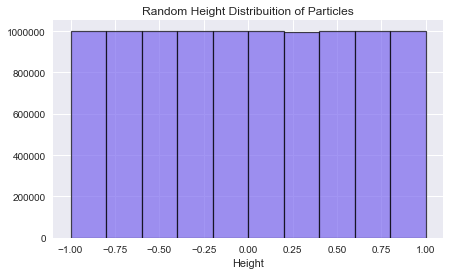

In [25]:
# Plotting Random Height Distribuition of Particles
plt.figure(figsize = (7,4))
plt.hist(a_height,edgecolor='black', linewidth=1.2, alpha = 0.7, color = 'mediumslateblue')
plt.title('Random Height Distribuition of Particles')
plt.xlabel('Height')
plt.show()

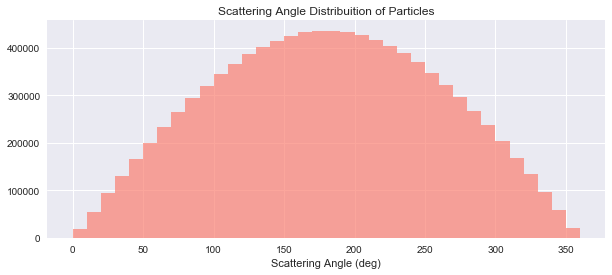

In [26]:
# Plotting Angle Distribuition of Particles
plt.figure(figsize = (10,4))

data = a_scattering_angle_deg
binwidth= 10
bins=np.arange(min(data), max(data)+ binwidth, binwidth)
plt.hist(data,bins  \
         , alpha = 0.7, color = 'salmon')
plt.title('Scattering Angle Distribuition of Particles')
plt.xlabel('Scattering Angle (deg)')
plt.show()

In [27]:
# probabilities 
a_histval,a_binedge = np.histogram(data, bins) # The histogram values and bin edges for probability
# finding the cuts I want
i_ninety_index = np.where(np.logical_or(a_binedge == 90,a_binedge == 100)) 
i_oneseventy_index =np.where(np.logical_or(a_binedge == 170,a_binedge == 180))
i_twenty_index =np.where(a_binedge == 20)
# Calculating the probabilities
f_ninety_probability = np.sum(a_histval[i_ninety_index])/np.sum(a_histval) * 100
f_oneseventy_probability = np.sum(a_histval[i_oneseventy_index])/np.sum(a_histval) * 100
f_twenty_probability = np.sum(a_histval[i_twenty_index])/np.sum(a_histval) * 100
#  little bit of a jig so I can get a cut offset by 5
a_histval_weird, a_binedge_weird = np.histogram(data,1, range = (175,185))
# more calculating probabilities
f_oneseventyfive_probability = np.sum(a_histval_weird)/ np.sum(a_histval)*100
# output of ratios of probabilities
print(f_ninety_probability/f_oneseventy_probability )
print(f_twenty_probability/f_oneseventy_probability )

0.7636962816870994
0.10704321127336508


### 2 Part C Probalities of Scattering Angle
Running the above code for 10000000 particles yields a probability output of  $ 76.246 \% $ for the scattering angle will fall between  $  90 ^{\circ} < \theta <  110 ^{\circ}   $  as  $ 170 ^{\circ} < \theta < 190 ^{\circ}  $. Running the same code for 20000000 (double of number before) particles the probability changes neglibly to be $ 76.185 \% $ for this angle range. 

Running the above code for 10000000 particles yields a probability output of $ 10.617 \%  $ for the scattering angle will fall between  $  20 ^{\circ} < \theta <  30 ^{\circ}   $  as  $ 175 ^{\circ} < \theta < 185 ^{\circ}  $. Running the same code for 20000000 (double of number before) particles the probability changes neglibly to be $ 10.643 \% $ for this angle range.

In fact, re-running the code for the same number of particles numerous times, small variances in the ouput probabilities can be observed on the same order as those observed when doubling the sampling number. From this, one can safely conclude that variance observed is merely due to variances caused by the finite random sampling, and that doubling the number of samples when already sampling a large number has virtually no effect on the probability analysis. 


In [ ]:
# Problem 3 
i_matrixsize = 200  # the  max matrix size
a_time = np.empty(i_matrixsize) # empty array of time to be filled
i_N = 2                         # initial matrix size 
for l in range(len(a_time)):
    # creates the matrices
    a_A = np.ones([i_N, i_N], float)*3
    a_B = np.ones([i_N, i_N], float)*3
    a_C = np.zeros([i_N,i_N],float)
    f_start = time.time()               # begin timer
    # forloop for matrix multiplication from Example 4.3 in Computational Physics by Mark Newman
    for i in range(i_N):
        for j in range(i_N):
            for k in range(i_N):
                a_C[i,j] += a_A[i,k]*a_B[k,j]
    f_end = time.time()                 # end timer
    a_time[l] = (f_end - f_start)       # fill array of times
    i_N += 1                            # increase matrix size

In [ ]:
a_dottime = np.empty(i_matrixsize)     # empty array for times for different calculation method
i_N = 2                                #  initial matrix size again
for l in range(len(a_dottime)): 
    # generate matrices
    a_A = np.ones([i_N, i_N], float)*3
    a_B = np.ones([i_N, i_N], float)*3
    a_C = np.zeros([i_N,i_N],float)
    f_start = time.time()              # begin timer
    a_C = np.dot(a_A,a_B)              # numpy package for matrix multiplication
    f_end = time.time()                # begin timer
    a_dottime[l] = (f_end - f_start) 
    i_N += 1                           # increase matrix size    

In [ ]:
a_N = np.linspace(2,(i_matrixsize+2),num = i_matrixsize)
print(len(a_N), len(a_time))
plt.figure(figsize = (7,7))
plt.scatter(a_N, a_time, color = 'c', s = 11, label = "Newman Multiplication Technique")
plt.scatter(a_N, a_dottime, color = 'r',s = 8, label = "Numpy Multiplication Technique")
plt.title('Time of Computation as  function of Matrix Size')
plt.xlabel(" NxN Matrix Size (N)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [ ]:
a_N_cubed = a_N**3
plt.figure(figsize = (7,7))
plt.scatter(a_N_cubed, a_time, color = 'c', s = 11, label = "Newman Multiplication Technique")
plt.scatter(a_N_cubed, a_dottime, color = 'r', s = 11, label = "Numpy Multiplication Technique")
plt.title('Time of Computation as  function of Matrix Size ^3')
plt.xlabel(" NxN Matrix Size (N^3)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

### Question 3
We notice that the nested for-loops that Newman suggested scaled in computational time as $N^3$ which is what he describes in the section. In comparison, the numpy.dot() function operates at a roughly constant speed